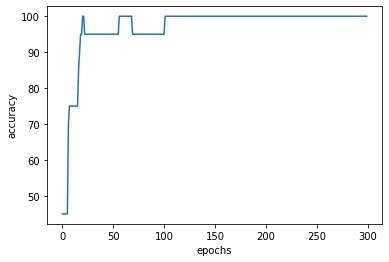

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
import random
import matplotlib.pyplot as plt
import math

"""
see more details at https://machinelearningmastery.com/implement-backpropagation-algorithm-scratch-python/
"""

def load_dataset(n_train_data):
    iris = datasets.load_iris()
    dataset = np.c_[iris['data'], iris['target']]
    mms = MinMaxScaler()
    for i in range(dataset.shape[1] - 1):
        dataset[:, i] = mms.fit_transform(dataset[:, i].reshape(-1, 1)).flatten()

    dataset = dataset.tolist()
    for row in dataset:
        row[4] = int(row[4])

    random.shuffle(dataset)
    train_data = dataset[0:n_train_data]
    val_data = dataset[n_train_data:]

    return train_data, val_data


def fun_z(weights, inputs):
    """z = weight * inputs + b
    param weights: W
    param inputs: n
    """
    bias_term = weights[-1]
    z = 0
    for i in range(len(weights)-1):
        z += weights[i] * inputs[i]
    z += bias_term
    return z


def sigmoid(z):
    """(Sigmoid)：f(z) = Sigmoid(z)
    """
    return 1.0 / (1.0 + math.exp(-z))


def sigmoid_derivative(output):
    """
    sigmoid derivative = sigmoid * (1-sigmoid)
    """
    return output * (1.0 - output)


def forward_propagate(network, inputs):
    """ iterate fun_z
    """
    for layer in network:
        new_inputs = []
        # traverse neurons in 
        for neuron in layer:
            z = fun_z(neuron['weights'], inputs)
            neuron['output'] = sigmoid(z)
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs


def backward_propagate_error(network, actual_label):
    """
    """
    # start with the last layer
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        # if not output (last) layer
        if i != len(network)-1:
            # calculate layer-wise err
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i + 1]:
                    # weight delta
                    error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error)
        else:
            # calculate layer-wise err
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(actual_label[j] - neuron['output'])
        # calculate delta to back-propagate
        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] = errors[j] * sigmoid_derivative(neuron['output'])


def update_parameters(network, row, l_rate):

    for i in range(len(network)):
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i - 1]]
        for neuron in network[i]:

            for j in range(len(inputs)):
                neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]

            neuron['weights'][-1] += l_rate * neuron['delta']


def initialize_network(n_inputs, n_hidden, n_outputs):

    network = list()

    hidden_layer = [{'weights': [random.random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
    network.append(hidden_layer)

    output_layer = [{'weights': [random.random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
    network.append(output_layer)
    return network


def train(train_data, l_rate, epochs, n_hidden, val_data):
    n_inputs = len(train_data[0]) - 1
    n_outputs = len(set([row[-1] for row in train_data]))
    network = initialize_network(n_inputs, n_hidden, n_outputs)

    acc = []
    for epoch in range(epochs):
        for row in train_data:

            _ = forward_propagate(network, row)

            actual_label = [0 for i in range(n_outputs)]
            actual_label[row[-1]] = 1

            backward_propagate_error(network, actual_label)

            update_parameters(network, row, l_rate)

        acc.append(validation(network, val_data))

    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(acc)
    plt.show()

    return network


def validation(network, val_data):

    predicted_label = []
    for row in val_data:
        prediction = predict(network, row)
        predicted_label.append(prediction)

    actual_label = [row[-1] for row in val_data]
    accuracy = accuracy_calculation(actual_label, predicted_label)

    return accuracy


def accuracy_calculation(actual_label, predicted_label):
    correct_count = 0
    for i in range(len(actual_label)):
        if actual_label[i] == predicted_label[i]:
            correct_count += 1
    return correct_count / float(len(actual_label)) * 100.0


def predict(network, row):
    outputs = forward_propagate(network, row)
    return outputs.index(max(outputs))


if __name__ == "__main__":

    l_rate = 0.1  # learning rate
    epochs = 300
    n_hidden = 5
    n_train_data = 130

    train_data, val_data = load_dataset(n_train_data)
    network = train(train_data, l_rate, epochs, n_hidden, val_data)